In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.simplefilter("ignore")

In [50]:
grp_orng=pd.read_csv('../../data/citrus.csv')

In [51]:
grp_orng.head()


,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [52]:
grp_orng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [53]:
grp_orng.dropna()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [54]:
grp_orng.weight.unique()

array([ 86.76,  88.05,  95.17, ..., 256.5 , 260.14, 261.51])

In [55]:
grp_orng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [56]:
#Multicollinearity 
grp_orng.iloc[:,[1,2,3,4]].corr()

,diameter,weight,red,green
diameter,1.000000,0.999476,-0.217821,-0.396832
weight,0.999476,1.000000,-0.214714,-0.392003
red,-0.217821,-0.214714,1.000000,0.148937
green,-0.396832,-0.392003,0.148937,1.000000


In [57]:
grp_orng['Binary_value']=grp_orng['name'].replace({'orange':0,'grapefruit':1})

In [124]:
res=sm.GLM.from_formula('name~diameter+red+green+blue',family=sm.families.Binomial(),data=grp_orng).fit() #weight 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['name[grapefruit]', 'name[orange]']   No. Observations:                10000
Model:                                              GLM   Df Residuals:                     9995
Model Family:                                  Binomial   Df Model:                            4
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -1715.6
Date:                                  Tue, 22 Sep 2020   Deviance:                       3431.2
Time:                                          12:26:38   Pearson chi2:                 7.98e+03
No. Iterations:                                       8                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2118      0.845     -3.800      0.000      -4.868      -1.555
diameter       1.9925      0.050     39.971      0.000       1.895       2.090
red           -0.0601      0.005    -13.242      0.000      -0.069      -0.051
green         -0.1166      0.005    -24.213      0.000      -0.126      -0.107
blue           0.1303      0.006     22.142      0.000       0.119       0.142
==============================================================================
"""

In [125]:
grp_orng['pre_binary']=0 
for i in range(len(res.predict())):
        if(res.predict()[i]<0.5):
            grp_orng['pre_binary'][i]='orange'
        else:
            grp_orng['pre_binary'][i]='grapefruit'
            

In [126]:
grp_orng['pre_binary']

0           orange
1           orange
2           orange
3           orange
4           orange
           ...    
9995    grapefruit
9996    grapefruit
9997    grapefruit
9998    grapefruit
9999    grapefruit
Name: pre_binary, Length: 10000, dtype: object

In [127]:
Time=np.random.rand(len(res.predict()))
Time

array([0.50555673, 0.96387538, 0.47404826, ..., 0.21800868, 0.10895599,
       0.36156291])

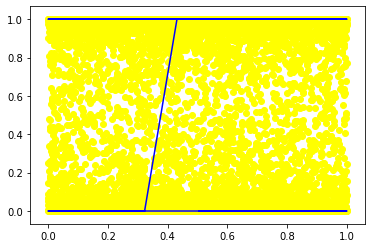

In [128]:
plt.plot(Time,grp_orng['Binary_value'],color='b')
plt.scatter(Time,res.predict(),color='yellow')

In [129]:
x=0
for i , j in zip(grp_orng['pre_binary'],grp_orng['name']):
    if(i!=j):
        
        x+=1
print(x/len(res.predict()))

0.0705


In [130]:
res.model.endog_names


['name[grapefruit]', 'name[orange]']

In [131]:
from sklearn.metrics import confusion_matrix, classification_report

In [132]:
grp_orng.head()


,name,diameter,weight,red,green,blue,Binary_value,pre_binary
0,orange,2.96,86.76,172,85,2,0,orange
1,orange,3.91,88.05,166,78,3,0,orange
2,orange,4.42,95.17,156,81,2,0,orange
3,orange,4.47,95.60,163,81,4,0,orange
4,orange,4.48,95.76,161,72,9,0,orange


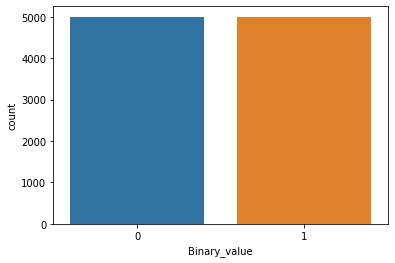

In [133]:
sns.countplot(grp_orng['Binary_value'])

In [134]:
print(confusion_matrix(grp_orng["name"], 
                            grp_orng['pre_binary']))

[[4635  365]
 [ 340 4660]]
